## RESAMPLING

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 2

Question 1 Using the full churn data set and a grid search, find an optimal value for the min_samples_split parameter of a DecisionTreeClassifier (among a reasonable list of values).

In [55]:
df = pd.read_csv('churn.csv')
print(df)

      Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0                 8          0                    38               0   
1                 0          0                    39               0   
2                10          0                    37               0   
3                10          0                    38               0   
4                 3          0                    38               0   
...             ...        ...                   ...             ...   
3145             21          0                    19               2   
3146             17          0                    17               1   
3147             13          0                    18               4   
3148              7          0                    11               2   
3149              8          1                    11               2   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370                71                 5   
1              

In [56]:
#assigning values to the dataset

df2 = df.drop(labels='Churn', axis=1, inplace=False)
x = df2
y = df.loc[:, 'Churn']

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [58]:
#defining the model and the parameter grid to search

decision_tree = DecisionTreeClassifier()
param_grid = {
    'min_samples_split': range(2, 300)}


grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'min_samples_split': range(2, 300)},
             scoring='accuracy')

In [59]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}".format(grid_search.best_score_))

Best Parameters:  {'min_samples_split': 5}
Best Accuracy: 0.94


Question 2 Using the results of the grid search from question 1, plot the estimates obtained
during the search for the best model.

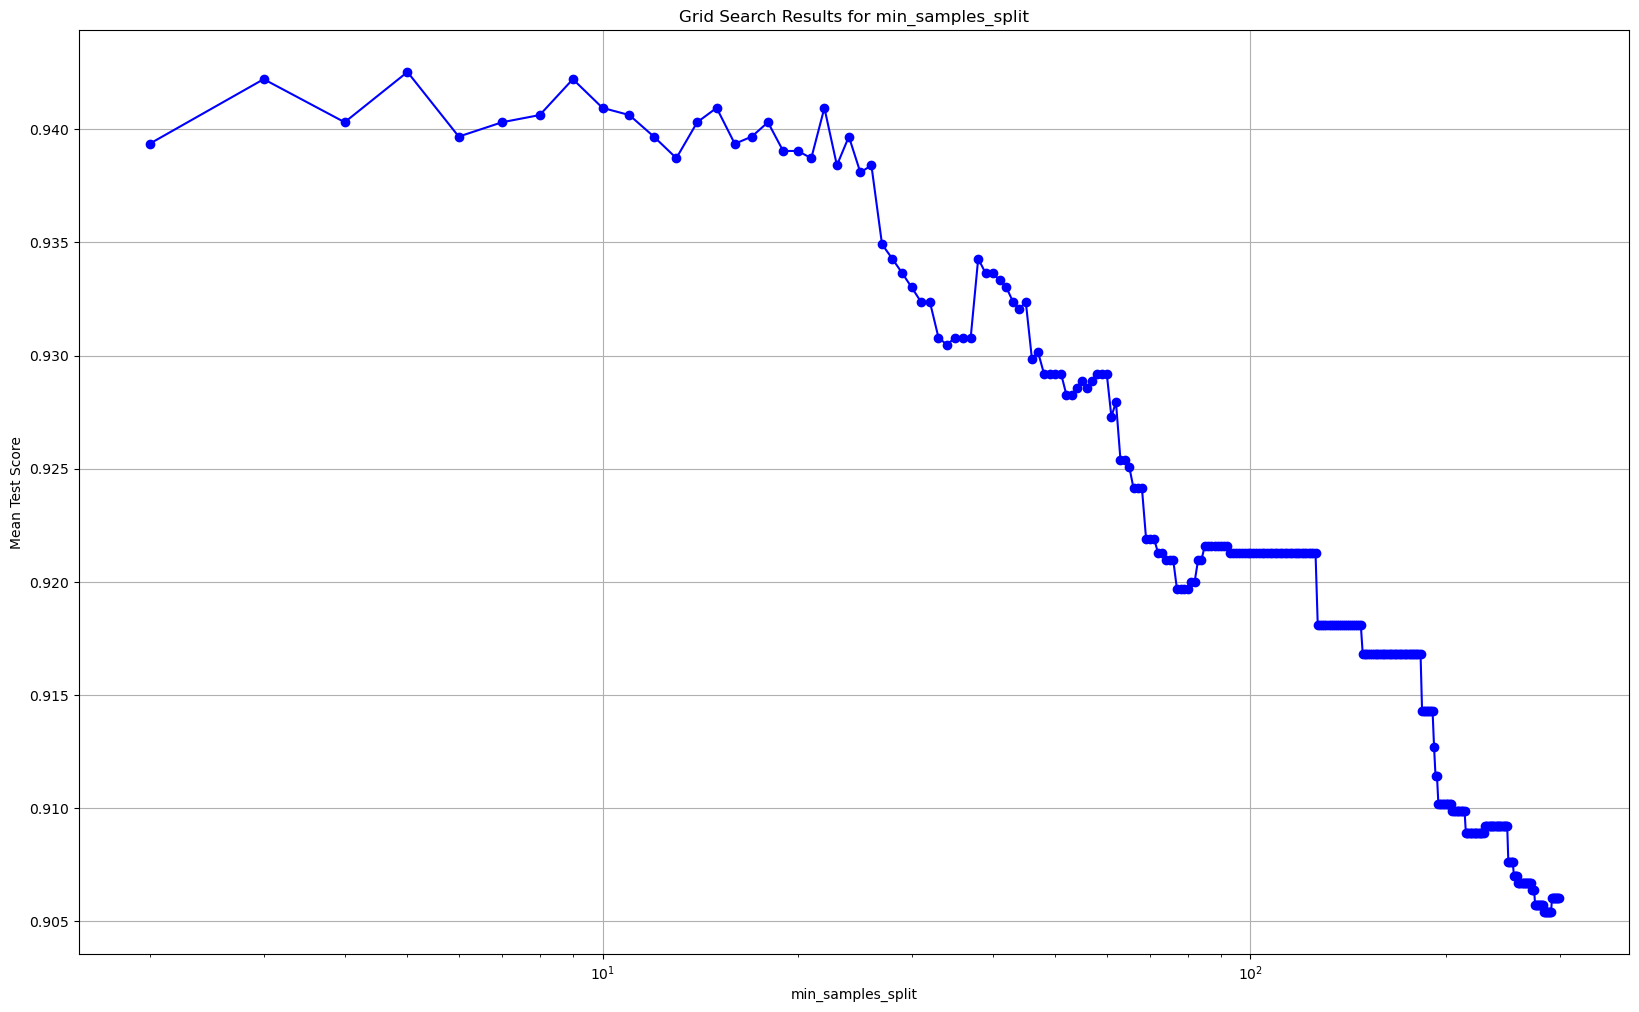

In [62]:
#Extracting the results from the GridSearchCV object

results = pd.DataFrame(grid_search.cv_results_)

#Extracting the values of min_samples_split and the corresponding mean_test_score

min_samples_split_values = results['param_min_samples_split'].astype(float)
mean_test_scores = results['mean_test_score']

#graphical representation

plt.figure(figsize=(20, 12))
plt.plot(min_samples_split_values, mean_test_scores, marker='o', linestyle='-', color='b')
plt.title('Grid Search Results for min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Mean Test Score')
plt.xscale('log') #use due to large variation in results, and hence to obtain better visualisation
plt.grid(True)
plt.show()

Question 3 Implement a full machine learning processing chain as follows:

1. use train_test_split to build a training set and a testing set with 30 % of the original data for testing;
2. use GridSearchCV to build an optimal decision tree by 5-fold cross-validation on the training set, optimizing the min_samples_split parameter;
3. estimate the future performances of the tree by computing and printing its confusion matrix and its accuracy on the test set.

Compare the performances predicted on the test set with the one obtained by 5-fold CV for the best parameters (available in the best_score_ attribute of the result of GridSearchCV).

In [63]:
#splitting the data set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [64]:
#making the optimal decision tree by 5-fold cross-validation
dt_classifier = DecisionTreeClassifier()

param_grid = {'min_samples_split': [3, 9, 12, 15, 18]}

#Create the GridSearchCV object
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

#Fit the model to the training data
grid_search.fit(x_train, y_train)

#Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validated Accuracy: {:.2f}".format(grid_search.best_score_))

# Get the best model
best_dt_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_dt_model.score(x_test, y_test)
print("Test Set Accuracy: {:.2f}".format(test_accuracy))

Best Parameters:  {'min_samples_split': 9}
Best Cross-Validated Accuracy: 0.93
Test Set Accuracy: 0.95


In [65]:
#cross-validating the results on the training set
cross_val_results = cross_val_score(decision_tree, x_train, y_train, cv=skf, scoring='accuracy')

print("Cross-Validation Results:", cross_val_results)
print("Mean Accuracy: {:.2f}".format(np.mean(cross_val_results)))

Cross-Validation Results: [0.94331066 0.93197279 0.93650794 0.90929705 0.92970522]
Mean Accuracy: 0.93


In [66]:
#future performances and accuracy on the test set

from sklearn.metrics import confusion_matrix, accuracy_score

#predictions on the test set
y_pred = best_dt_model.predict(x_test)

#the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

#the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy: {:.2f}".format(accuracy))

Confusion Matrix:
 [[796  13]
 [ 36 100]]
Test Set Accuracy: 0.95


With regard to performances on the test set obtained by the 5-fold Cross Validation method, we see that the test set accuracy increased by 2% for the best parameters. Since the difference is very small, and the test accuracy is close to the cross-validated accuracy, we can say that the model suggests good generalisation and can hence be fitted to new data, overcoming the issue of 'overfitting'.

Question 4 Assess the stability of this procedure in terms of the optimal parameter obtained and in terms of performance estimates. The goal of this analysis is to see whether the variability induced by the split sample approach (as seen in the first exercise) has consequences on the outcomes of the procedure.

In [67]:
num_iterations = 10 

optimal_parameters = []
test_accuracies = []
cv_accuracies = []

for _ in range(num_iterations):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    #GridSearchCV to find the optimal decision tree
    dt_classifier = DecisionTreeClassifier()
    param_grid = {'min_samples_split': [2, 5, 10, 15, 20]}
    grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(x_train, y_train)

    #Recording the optimal parameter, test accuracy, and cross-validated accuracy
    optimal_parameters.append(grid_search.best_params_['min_samples_split'])
    
    best_dt_model = grid_search.best_estimator_
    y_pred_test = best_dt_model.predict(x_test)
    test_accuracies.append(accuracy_score(y_test, y_pred_test))
    
    cv_accuracies.append(grid_search.best_score_)


print("Optimal Parameters across Iterations:", optimal_parameters)
print("Test Accuracies across Iterations:", test_accuracies)
print("Cross-validated Accuracies across Iterations:", cv_accuracies)

Optimal Parameters across Iterations: [15, 10, 10, 15, 15, 15, 2, 5, 5, 2]
Test Accuracies across Iterations: [0.9248677248677248, 0.9238095238095239, 0.9227513227513228, 0.926984126984127, 0.926984126984127, 0.9238095238095239, 0.9301587301587302, 0.9322751322751323, 0.928042328042328, 0.9312169312169312]
Cross-validated Accuracies across Iterations: [0.945124716553288, 0.944671201814059, 0.943764172335601, 0.9469387755102041, 0.9464852607709752, 0.9478458049886621, 0.944671201814059, 0.944671201814059, 0.94421768707483, 0.944671201814059]


The cross-validation accuracies are higher.